In [3]:
import tensorflow as tf
tf.enable_eager_execution()

In [4]:
import numpy as np

import sys
import os

if sys.version_info.major >= 3:
    import pathlib
else:
    import pathlib2 as pathlib

In [6]:
archive_path = tf.keras.utils.get_file("resnet_v2_101.tgz", "https://storage.googleapis.com/download.tensorflow.org/models/tflite_11_05_08/resnet_v2_101.tgz", extract=True)
archive_path = pathlib.Path(archive_path)
archive_dir = str(archive_path.parent)

In [7]:
!type {archive_dir}\resnet_v2_101_299_info.txt

Model: resnet_v2_101
Input: input
Output: output


In [ ]:
graph_def_file = pathlib.Path(archive_path).parent/"resnet_v2_101_299_frozen.pb"
input_arrays = ["input"] 
output_arrays = ["output"]
converter = tf.lite.TFLiteConverter.from_frozen_graph(
  str(graph_def_file), input_arrays, output_arrays, input_shapes={"input":[1,299,299,3]})
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
resnet_tflite_file = graph_def_file.parent/"resnet_v2_101_quantized.tflite"
resnet_tflite_file.write_bytes(converter.convert())

In [ ]:
!dir /s {archive_dir}\*.tflite

In [ ]:
!dir /s {archive_dir}\*.tflite

In [ ]:
tf.logging.set_verbosity(tf.logging.DEBUG)

In [ ]:
#graph_def_file = pathlib.Path(archive_path).parent/"resnet_v2_101_299_frozen.pb"
#input_arrays = ["input"] 
#output_arrays = ["output"]
converter = tf.lite.TFLiteConverter.from_saved_model("C:\\Users\\Chanchala\\resnet50_v2\\NHWC")  
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
resnet_tflite_path = pathlib.Path("C:\\Users\\Chanchala\\resnet50_v2\\NHWC")
resnet_tflite_file = resnet_tflite_path/"resnet_v2_101_quantized_from_saved_model.tflite"
resnet_tflite_file.write_bytes(converter.convert())

In [11]:
from os import listdir
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

input_dir = "D:\\Imagenet\\test_5"
inputfiles = [f for f in listdir(input_dir)]
def preprocess(input_data):
    # convert the input data into the float32 input

    img_data = input_data.astype('float32')
    img_data = img_data.reshape(1, 299, 299, 3)

    #normalize
    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])
    norm_img_data = np.zeros(img_data.shape).astype('float32')
    for i in range(img_data.shape[0]):
        norm_img_data[i,:,:] = (img_data[i,:,:]/255 - mean_vec[i]) / stddev_vec[i]
    return norm_img_data
    #return img_data
input_gen_list = []
for a in inputfiles:
    im = cv2.imread(f'{input_dir}\\{a}')
    #print (type(im))
    #print(im.shape)
    im2 = cv2.resize(im, (299,299))
    #print(im2.shape)
    #plt.imshow(im2)
    im3 = im2.astype(dtype=np.float32)/255
    #image = Image.open(f'{input_dir}\\{a}')
    #new_image = image.resize((299,299))
    #image_data = np.array(new_image).transpose(2, 0, 1)
    #input_data = preprocess(image_data)
    #input_data = preprocess(np.array(new_image).transpose(2,0,1))
    data_last = np.stack([im3]*1)
    input_gen_list.append(data_last)
    #print (type(input_data))
    #print (input_data.shape)
    #print (input_data)
    #final_data = tf.cast(input_data, tf.float32)
    #print (type(final_data))
    #print (final_data.shape)
    #print(final_data)

In [ ]:
graph_def_file = pathlib.Path(archive_path).parent/"resnet_v2_101_299_frozen.pb"
input_arrays = ["input"] 
output_arrays = ["output"]
converter = tf.lite.TFLiteConverter.from_frozen_graph(
  str(graph_def_file), input_arrays, output_arrays, input_shapes={"input":[1,299,299,3]})
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
resnet_tflite_file = graph_def_file.parent/"resnet_v2_101_quantized_actual.tflite"
resnet_tflite_file.write_bytes(converter.convert())

In [12]:
def representative_data_gen():
  for input_value in input_gen_list:
    yield [input_value]

graph_def_file = pathlib.Path(archive_path).parent/"resnet_v2_101_299_frozen.pb"
input_arrays = ["input"] 
output_arrays = ["output"]
converter = tf.lite.TFLiteConverter.from_frozen_graph(
  str(graph_def_file), input_arrays, output_arrays, input_shapes={"input":[1,299,299,3]})
converter.optimizations = [tf.lite.Optimize.DEFAULT]


converter.representative_dataset = representative_data_gen

resnet_tflite_file = graph_def_file.parent/"resnet_v2_101_quantizedfully.tflite"
resnet_tflite_file.write_bytes(converter.convert())

46105840

In [13]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="C:\\Users\\Chanchala\\.keras\\datasets\\resnet_v2_101_quantizedfully.tflite")
interpreter.allocate_tensors()

In [47]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="C:\\Users\\Chanchala\\.keras\\datasets\\resnet_v2_101_fully_quantized.tflite")
interpreter.allocate_tensors()

In [17]:
# Load TFLite model and allocate tensors.
#interpreter = tf.lite.Interpreter(model_path="C:\\Users\\Chanchala\\.keras\\datasets\\resnet_v2_101_299.tflite")
#interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
print(input_details)
output_details = interpreter.get_output_details()
print(output_details)

In [14]:
input_details = interpreter.get_input_details()
print(input_details)
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'input', 'index': 501, 'shape': array([  1, 299, 299,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
[{'name': 'output', 'index': 502, 'shape': array([   1, 1001]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [15]:
# Test model on random input data.
input_shape = input_details[0]['shape']
print (input_shape)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
print (input_data.shape)

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[  1 299 299   3]
(1, 299, 299, 3)
[[-0.9236112  -1.570139    0.6465279  ... -0.27708337 -1.2930558
   2.0319448 ]]


In [41]:
%matplotlib inline

<class 'numpy.ndarray'>
(368, 500, 3)
(299, 299, 3)
(1, 299, 299, 3)
[[ 0.18472224 -0.8312501  -1.2930558  ... -1.0159724  -0.09236112
   0.        ]]
59


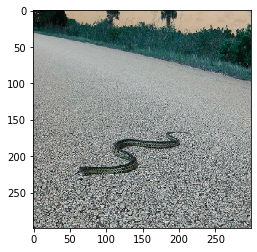

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
im = cv2.imread("D:\\Imagenet\\test_5\\ILSVRC2012_val_00000006.JPEG")
print (type(im))
print(im.shape)
im2 = cv2.resize(im, (299,299))
print(im2.shape)
plt.imshow(im2)
im3 = im2.astype(dtype=np.float32)/255
#plt.imshow(im3)
#cv2.imwrite('D:\\color_img.jpg', im3)
#data_last = np.expand_dims(im3, axis=0)

data_last = np.stack([im3]*1)
print (data_last.shape)
interpreter.set_tensor(input_details[0]['index'], data_last)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
#print (output_details)
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print (np.argmax(output_data))

In [43]:
tf.nn.top_k(output_data, k=5, sorted=True, name=None)

TopKV2(values=<tf.Tensor: id=18, shape=(1, 5), dtype=float32, numpy=
array([[17.229591 ,  6.821391 ,  5.8928347,  5.3147173,  5.231391 ]],
      dtype=float32)>, indices=<tf.Tensor: id=19, shape=(1, 5), dtype=int32, numpy=array([[950, 869, 929, 957, 954]])>)

In [46]:
# Test model on random input data.
from PIL import Image 
import matplotlib.pyplot as plt
img = plt.imread("D:\\Imagenet\\test_5\\ILSVRC2012_val_00000006.JPEG")
#plt.imshow(img)
print(img.shape)
img2 = Image.open("D:\\Imagenet\\test_5\\ILSVRC2012_val_00000099.JPEG")
img3 = img2.resize((299,299))
#img4 = img3.astype(dtype=np.float32)
#print (img4.shape)
#plt.imshow(img3)
#print ("image 3------------")
#print (img3)
#print ("------------")
data_last = np.expand_dims(img3, axis=0)
print(data_last.shape)
print (type(data_last))
print(data_last)
data = data_last.astype(dtype=np.float32)/255
print (data.shape)
#data_2 = data[0,:,:, 0]
#print(data_2.shape)
#plt.imshow(data_2)
interpreter.set_tensor(input_details[0]['index'], data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print (np.argmax(output_data))
#input_dir = "D:\\Imagenet\\test_5"
#image = np.asarray(Image.open(f'{input_dir}\\ILSVRC2012_val_00000006.JPEG').resize(299,299))
#final_image = image.reshape(1,299,299,3)

(368, 500, 3)
(1, 299, 299, 3)
<class 'numpy.ndarray'>
[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]]
(1, 299, 299, 3)
[[ 0.00545132 -1.1213781   0.12073965 ... -2.029674    1.2833422
  -0.21349734]]
950


In [ ]:
# Test model on random input data.
from PIL import Image 

input_dir = "D:\\Imagenet\\test_5"
#image = np.asarray(Image.open(f'{input_dir}\\ILSVRC2012_val_00000006.JPEG').resize(299,299))
#final_image = image.reshape(1,299,299,3)
image = Image.open(f'{input_dir}\\ILSVRC2012_val_00000006.JPEG')
new_image = image.resize((299,299))

#image_data = np.array(new_image).transpose(2, 0, 1)
#input_data = preprocess(np.array(new_image))
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


In [ ]:
print (np.argmax(output_data))

In [ ]:
# Test model on random input data.
image = Image.open(f'{input_dir}\\ILSVRC2012_val_00000006.JPEG')
new_image = image.resize((299,299))
#image_data = np.array(new_image).transpose(2, 0, 1)
input_data = preprocess(np.array(new_image))
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
